In [10]:
using Pkg
Pkg.activate("../")

using Plots

using LinearAlgebra
using SparseArrays

using Revise
using MarkovModels

  Activating environment at `~/GithubRepositories/MarkovModels.jl/Project.toml`
┌ Info: Precompiling MarkovModels [c2ae6250-d0a1-11ea-0991-234599ce5244]
└ @ Base loading.jl:1317


In [11]:
SF = LogSemifield{Float64}

SemifieldAlgebra.Semifield{Float64, StatsFuns.logaddexp, +, -, -Inf, 0}

In [12]:
S, N = 3, 100 # number of states, number of frames
lhs = rand(Float64, S, N) # simulated likelihoods

3×100 Matrix{Float64}:
 0.53249   0.107836  0.473995  0.583926  …  0.211177  0.150852  0.849361
 0.976533  0.818441  0.160382  0.177619     0.639885  0.233459  0.698999
 0.423817  0.677089  0.126327  0.540479     0.894299  0.406515  0.660697

In [13]:
lhs = convert(Matrix{SF}, lhs)

3×100 Matrix{SemifieldAlgebra.Semifield{Float64, StatsFuns.logaddexp, +, -, -Inf, 0}}:
  0.53249  0.107836  0.473995  0.583926  …  0.211177  0.150852  0.849361
 0.976533  0.818441  0.160382  0.177619     0.639885  0.233459  0.698999
 0.423817  0.677089  0.126327  0.540479     0.894299  0.406515  0.660697

In [14]:
pinit = spzeros(SF, S)
pinit[1] = one(SF)
pfinal = spzeros(SF, S)
pfinal[1] = one(SF)
A = spzeros(SF, S, S)
A[1,1] = A[1,2] = log(1/2)
A[2,2] = A[2,3] = log(1/2)
A[3,3] = one(SF)

A

3×3 SparseMatrixCSC{SemifieldAlgebra.Semifield{Float64, StatsFuns.logaddexp, +, -, -Inf, 0}, Int64} with 5 stored entries:
 -0.693147  -0.693147        ⋅  
       ⋅    -0.693147  -0.693147
       ⋅          ⋅          0.0

In [15]:
αβrecursion

αβrecursion (generic function with 1 method)

In [18]:
lnγ = αβrecursion(pinit, pfinal, A, convert(Matrix{SF}, lhs))

LoadError: DimensionMismatch("tried to assign 3-element array to 1×1 destination")

3×100 SparseMatrixCSC{MarkovModels.SemiField{Float64,+,*,/,0,1},Int64} with 294 stored entries:
  [2,   1]  =  0.677085
  [2,   2]  =  0.0282232
  [3,   2]  =  0.0282232
  [1,   3]  =  2.16596e-5
  [2,   3]  =  0.0120477
  [3,   3]  =  0.0120693
  [1,   4]  =  0.00485565
  [2,   4]  =  0.00214654
  [3,   4]  =  0.00700169
  [1,   5]  =  0.00453313
  [2,   5]  =  5.84774e-7
  [3,   5]  =  0.00231764
  ⋮
  [3,  95]  =  2.74486e-69
  [1,  96]  =  2.95375e-69
  [2,  96]  =  1.55343e-75
  [3,  96]  =  8.31692e-70
  [1,  97]  =  1.31034e-69
  [2,  97]  =  3.84635e-76
  [3,  97]  =  2.79539e-70
  [1,  98]  =  8.70487e-71
  [2,  98]  =  1.45053e-76
  [3,  98]  =  8.19914e-71
  [1,  99]  =  2.67683e-71
  [3,  99]  =  2.61254e-71
  [1, 100]  =  5.55533e-72

3×100 SparseMatrixCSC{MarkovModels.SemiField{Float64,+,*,/,0,1},Int64} with 294 stored entries:
  [2,   1]  =  1.84386e-72
  [2,   2]  =  4.37932e-71
  [3,   2]  =  4.72445e-74
  [1,   3]  =  1.6081e-79
  [2,   3]  =  1.0248e-70
  [3,   3]  =  6.15614e-71
  [1,   4]  =  7.00057e-78
  [2,   4]  =  2.29663e-70
  [3,   4]  =  1.53034e-70
  [1,   5]  =  1.5339e-77
  [2,   5]  =  2.81281e-67
  [3,   5]  =  4.6244e-70
  ⋮
  [3,  95]  =  0.000450074
  [1,  96]  =  4.59348e-7
  [2,  96]  =  0.00395152
  [3,  96]  =  0.00148493
  [1,  97]  =  1.31626e-6
  [2,  97]  =  0.00996367
  [3,  97]  =  0.00441664
  [1,  98]  =  0.000341033
  [2,  98]  =  0.0147125
  [3,  98]  =  0.0150535
  [1,  99]  =  0.0461735
  [3,  99]  =  0.0461735
  [1, 100]  =  0.5

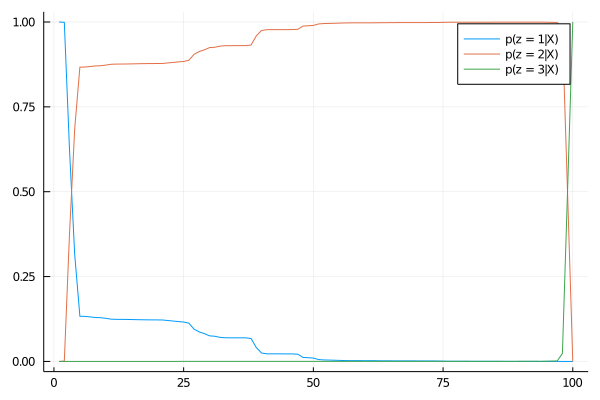

In [10]:
lnγ = αβrecursion(p, convert(Matrix{SF}, lhs))
γ = transpose(cfsm.state_pdf) * lnγ
γ = convert(Matrix{Float64}, γ)

p = plot()
plot!(p, γ[1,:], label = "p(z = 1|X)")
plot!(p, γ[2,:], label = "p(z = 2|X)")
plot!(p, γ[3,:], label = "p(z = 3|X)")

In [115]:
resps(cfsm, Matrix(lnγ))

LoadError: [91mMethodError: [0mCannot `convert` an object of type [92mArray{MarkovModels.SemiField{Float64,StatsFuns.logaddexp,+,-,-Inf,0},2}[39m[0m to an object of type [91mFloat64[39m[39m
[91m[0mClosest candidates are:[39m
[91m[0m  convert(::Type{var"#s17"} where var"#s17"<:Real, [91m::MarkovModels.SemiField{T,+,*,/,0,1} where T[39m) at /home/lucas/GithubRepositories/MarkovModels.jl/src/algstruct.jl:47[39m
[91m[0m  convert(::Type{var"#s17"} where var"#s17"<:Real, [91m::MarkovModels.SemiField{T,StatsFuns.logaddexp,+,-,-Inf,0} where T[39m) at /home/lucas/GithubRepositories/MarkovModels.jl/src/algstruct.jl:48[39m
[91m[0m  convert(::Type{var"#s17"} where var"#s17"<:Real, [91m::MarkovModels.SemiField{T,max,+,-,-Inf,0} where T[39m) at /home/lucas/GithubRepositories/MarkovModels.jl/src/algstruct.jl:49[39m
[91m[0m  ...[39m

In [180]:
lnγ

3×100 SparseMatrixCSC{MarkovModels.Semifield{Float64,StatsFuns.logaddexp,+,-,-Inf,0.0},Int64} with 300 stored entries:
  [1,   1]  =  -Inf
  [2,   1]  =  0.0
  [3,   1]  =  -Inf
  [1,   2]  =  -Inf
  [2,   2]  =  -8.57002e-5
  [3,   2]  =  -9.3647
  [1,   3]  =  -18.1097
  [2,   3]  =  -0.00066499
  [3,   3]  =  -7.31609
  [1,   4]  =  -16.1693
  [2,   4]  =  -0.00141929
  [3,   4]  =  -6.55838
  ⋮
  [3,  96]  =  -9.81618
  [1,  97]  =  -4.77546e-5
  [2,  97]  =  -14.4709
  [3,  97]  =  -9.96039
  [1,  98]  =  -3.99254e-5
  [2,  98]  =  -16.7157
  [3,  98]  =  -10.1299
  [1,  99]  =  -1.49513e-5
  [2,  99]  =  -Inf
  [3,  99]  =  -11.1107
  [1, 100]  =  0.0
  [2, 100]  =  -Inf
  [3, 100]  =  -Inf

In [181]:
lnαβ = αβrecursion(cfsm, llh, pruning = ThresholdPruning(50))
γ = resps(fsm, lnαβ)

p = plot()
plot!(p, γ[1], label = "p(z = 1|X)")
plot!(p, γ[2], label = "p(z = 2|X)")
plot!(p, γ[3], label = "p(z = 3|X)")

LoadError: TypeError: in keyword argument pruning, expected Number, got a value of type ThresholdPruning

In [150]:
using SparseArrays

L = eltype(cfsm.A)
L_llh = convert(Matrix{L}, llh[cfsm.pdfidx_map, :])

LoadError: type CompiledFSM has no field pdfidx_map

In [51]:
S = 3
spzeros(S,S)


2×2 SparseMatrixCSC{MarkovModels.Semifield{Float64,StatsFuns.logaddexp,+,-,-Inf,0.0},Int64} with 2 stored entries:
  [1, 1]  =  -Inf
  [2, 2]  =  -Inf

In [28]:
α = sparse(zeros(L, MarkovModels.nstates(cfsm), size(L_llh, 2)))
Aᵀ = transpose(cfsm.A)
α[:, 1] = L_llh[:, 1] .* cfsm.π
for n in 2:N
    α[:, n] = (Aᵀ * α[:, n-1]) .* L_llh[:, n]
end
α

3×5 SparseMatrixCSC{MarkovModels.Semifield{Float64,StatsFuns.logaddexp,+,-,-Inf,0.0},Int64} with 12 stored entries:
  [2, 1]  =  1.99648
  [2, 2]  =  0.273776
  [3, 2]  =  0.102643
  [1, 3]  =  -0.834499
  [2, 3]  =  -0.663367
  [3, 3]  =  2.32829
  [1, 4]  =  0.267885
  [2, 4]  =  -2.76521
  [3, 4]  =  0.478586
  [1, 5]  =  -0.356424
  [2, 5]  =  -4.19355
  [3, 5]  =  0.386524

```python
    def _baum_welch_backward(self, llhs):
        log_trans_mat = self.trans_log_probs
        log_betas = torch.zeros_like(llhs) - float('inf')
        log_betas[-1] = self.final_log_probs
        for i in reversed(range(llhs.shape[0]-1)):
            log_betas[i] = torch.logsumexp(log_trans_mat + llhs[i+1] + \
                           log_betas[i+1], dim=1).view(-1)
        return log_betas
```

In [24]:
β = sparse(zeros(L, MarkovModels.nstates(cfsm), size(L_llh, 2)))
A = cfsm.A
β[:, end] = L_llh[:, 1] .* cfsm.ω
for n in N-1:-1:1
    β[:, n] = (A * β[:, n+1] .* L_llh[:, n])
end
β

3×5 Array{MarkovModels.Semifield{Float64,StatsFuns.logaddexp,+,-,-Inf,0.0},2}:
 1.84497  -0.458353  0.264346  0.201489  1.30333
  5.6821    2.77162    0.4675      -Inf     -Inf
 1.25362    2.59154   3.44464  0.404642     -Inf

In [27]:
γ = α .* β ./ sum(γ, dims=1)
#exp.(Matrix{Float64}(γ))

3×5 Array{MarkovModels.Semifield{Float64,StatsFuns.logaddexp,+,-,-Inf,0.0},2}:
 -Inf       -Inf     -6.34738  -0.921333   0.0
  0.0   -0.53288      -5.9731       -Inf  -Inf
 -Inf  -0.884095  -0.00430692  -0.507478  -Inf

In [26]:
using SparseArrays

In [35]:
state_set = Set( s for s in filter(isemitting, collect(states(fsm))))
S = length(state_set)

A = sparse(zeros(LogSemiring{Float64}, S, S))

for s in state_set
    for (ns, weightpath) in MarkovModels.nextemittingstates(s)
        A[s.pdfindex, ns.pdfindex] = weightpath
    end
end

A 
Aᵀ = transpose(A)

3×3 Transpose{MarkovModels.Semiring{Float64,StatsFuns.logaddexp,+,-Inf,0},SparseMatrixCSC{MarkovModels.Semiring{Float64,StatsFuns.logaddexp,+,-Inf,0},Int64}}:
 -0.693147       -Inf       -Inf
 -0.693147  -0.693147       -Inf
      -Inf  -0.693147  -0.693147

In [67]:
startstates = Dict(s => w for (s,w) in MarkovModels.nextemittingstates(initstate(fsm)))
endstates = Dict(s => w for (s,w) in MarkovModels.nextemittingstates(initstate(transpose(fsm))))

Dict{State,Float64} with 1 entry:
  State(2, 3, c, Link[...]) => -0.693147

In [68]:
ls_llh = [convert(Vector{LogSemiring{Float64}}, col) for col in eachcol(llh) ]

α = [sparse(zeros(LogSemiring{Float64}, S))]
for (s,w) in startstates 
    α[1][s.pdfindex] = LogSemiring{Float64}(w) * ls_llh[1][s.pdfindex]
end 

for n in 2:N 
    push!(α, (Aᵀ * α[end]) .* ls_llh[n] ) 
end

In [69]:
α

5-element Array{SparseVector{MarkovModels.Semiring{Float64,StatsFuns.logaddexp,+,-Inf,0},Int64},1}:
   [1]  =  0.39235
   [1]  =  -0.29094
  [2]  =  -0.383922
   [1]  =  0.0662038
  [2]  =  -0.310888
  [3]  =  -2.50271
   [1]  =  -1.05058
  [2]  =  -2.04096
  [3]  =  0.291114
   [1]  =  -1.85019
  [2]  =  0.406191
  [3]  =  1.38859

In [70]:
lnα

LoadError: UndefVarError: lnα not defined

In [40]:
ls_llh[1]

3-element Array{MarkovModels.Semiring{Float64,StatsFuns.logaddexp,+,-Inf,0},1}:
   2.2832521142797293
   -1.831520532078208
 -0.42362611074623524

In [41]:
A

3×3 SparseMatrixCSC{MarkovModels.Semiring{Float64,StatsFuns.logaddexp,+,-Inf,0},Int64} with 5 stored entries:
  [1, 1]  =  -0.693147
  [1, 2]  =  -0.693147
  [2, 2]  =  -0.693147
  [2, 3]  =  -0.693147
  [3, 3]  =  -0.693147

In [ ]:
statemap